In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine

%load_ext autotime

time: 0 ns (started: 2021-05-19 14:53:46 +03:00)


In [9]:
elmo = hub.Module("http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz",trainable=True)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
embeddings = elmo(["это предложение", "word"], signature="default", as_dict=True)["elmo"]
sess.run(embeddings)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


array([[[ 0.0581738 ,  0.22493353, -0.19202927, ..., -0.14448935,
         -0.12425558,  1.0148408 ],
        [ 0.53596294,  0.28685364,  0.28028548, ..., -0.08028373,
          0.49089068,  0.75939953]],

       [[ 0.34336382,  1.0031188 , -0.15972555, ...,  1.2442508 ,
          0.61029303,  0.43388307],
        [ 0.0537075 ,  0.0226092 ,  0.01074906, ...,  0.08748816,
         -0.00664151, -0.01344293]]], dtype=float32)

In [ ]:
elmo = hub.Module("http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-wiki_600k_steps.tar.gz",trainable=True)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
embeddings = elmo(['Франция', 'Париж', 
                   'Москва', 'Россия',
                   'Берлин', 'Германия',
                   'Мадрид', 'Испания'], signature="default", as_dict=True)["elmo"]
sess.run(embeddings)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


time: 9min 24s (started: 2021-05-18 16:40:27 +03:00)


In [5]:
country_capital = sess.run(embeddings)

time: 172 ms (started: 2021-05-18 17:07:14 +03:00)


In [9]:
country_capital

array([[[-0.84621024,  0.05867158, -1.5914366 , ..., -0.31921527,
          1.3926604 ,  0.355668  ]],

       [[-0.4513362 ,  0.6690434 , -1.7019466 , ..., -0.3039302 ,
          0.6622373 , -0.24026863]],

       [[-0.1989099 ,  0.74541754, -1.2091999 , ..., -1.0831275 ,
          0.34136212,  0.6883013 ]],

       ...,

       [[-0.35017276,  0.2765883 , -1.5402951 , ..., -0.78940684,
          0.8426382 , -0.10734597]],

       [[-0.11254781,  1.009404  , -2.1166263 , ..., -0.32722464,
         -0.10330276, -0.33387935]],

       [[-0.55032325,  0.4304999 , -1.352938  , ...,  0.01578309,
          0.4204201 , -0.27744353]]], dtype=float32)

time: 0 ns (started: 2021-05-18 17:08:46 +03:00)


In [10]:
france_emb = country_capital[0][0]
paris_emb = country_capital[1][0]
moscow_emb = country_capital[2][0]
russia_emb = country_capital[3][0]
berlin_emb = country_capital[4][0]
germany_emb = country_capital[5][0]
madrid_emb = country_capital[6][0]
spain_emb = country_capital[7][0]

time: 0 ns (started: 2021-05-18 17:09:06 +03:00)


In [15]:
test = pd.DataFrame()

test = test.append(pd.Series(paris_emb),ignore_index=True)
test = test.append(pd.Series(france_emb),ignore_index=True)
test = test.append(pd.Series(moscow_emb),ignore_index=True)
test = test.append(pd.Series(russia_emb),ignore_index=True)
test = test.append(pd.Series(berlin_emb),ignore_index=True)
test = test.append(pd.Series(germany_emb),ignore_index=True)

test

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.451336,0.669043,-1.701947,-0.345939,-0.580567,0.782407,0.643206,0.799172,-0.397707,-0.122498,...,-0.101353,0.737369,0.786005,-0.731178,-0.280438,-0.439771,0.494726,-0.303930,0.662237,-0.240269
1,-0.846210,0.058672,-1.591437,0.154714,0.224115,0.778218,0.030351,0.850035,-0.858431,-0.535816,...,-0.527185,1.222249,1.284313,-1.229501,-0.286853,-0.637282,1.299012,-0.319215,1.392660,0.355668
2,-0.198910,0.745418,-1.209200,0.016930,-0.552040,0.278143,0.752962,1.304312,0.021309,-0.762618,...,-0.552827,1.105210,1.080418,-1.383070,-0.003723,-0.116183,0.891633,-1.083127,0.341362,0.688301
3,-0.655900,0.695442,-1.112282,0.275990,0.500730,0.867387,0.047354,0.720893,-0.380769,-0.809144,...,-0.631850,0.858966,1.392764,-1.081263,-0.428472,-0.244847,0.870651,-0.113517,0.797233,0.129259
4,-0.178571,0.357160,-1.615419,0.040427,0.242609,1.076097,0.599570,0.563330,-0.316711,-0.833079,...,-0.295605,0.790747,0.412304,-1.056693,0.011285,-0.375684,0.362035,-1.499198,1.060966,-0.171475
5,-0.350173,0.276588,-1.540295,-0.053664,0.113315,0.877835,0.468535,1.073846,-0.243518,-0.856439,...,-0.745622,1.798705,0.832459,-1.049453,-0.189293,0.008857,0.841048,-0.789407,0.842638,-0.107346


time: 32 ms (started: 2021-05-18 17:11:34 +03:00)


In [18]:
pca = PCA(n_components=2)
pca.fit_transform(test)

array([[ 8.4957695 , -0.86018646],
       [-7.17585   , -5.3037663 ],
       [ 2.1555364 ,  9.565234  ],
       [-9.262798  ,  5.216065  ],
       [11.236277  , -2.9972246 ],
       [-5.448938  , -5.6201262 ]], dtype=float32)

time: 31 ms (started: 2021-05-18 17:13:55 +03:00)


In [19]:
test = pca.fit_transform(test)

time: 15 ms (started: 2021-05-18 17:14:01 +03:00)


In [20]:
x = [row[0] for row in test]
y = [row[1] for row in test]
names = ['Париж', 'Франция', 'Москва', 'Россия', 'Берлин','Германия']

time: 0 ns (started: 2021-05-18 17:14:02 +03:00)


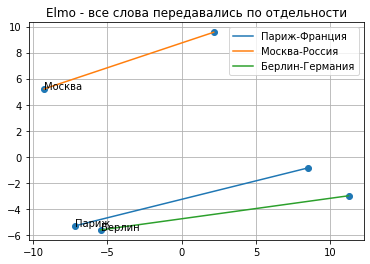

time: 172 ms (started: 2021-05-18 17:17:10 +03:00)


In [24]:
plt.scatter(x,y)
plt.plot([ 8.4957695 , -7.17585 ],[ -0.86018646  , -5.3037663 ],label='Париж-Франция')
plt.plot([ 2.1555364 , -9.262798 ],[ 9.565234    , 5.216065 ],label='Москва-Россия')
plt.plot([  11.236277 , -5.448938 ],[ -2.9972246  , -5.6201262 ],label='Берлин-Германия')
plt.text(-7.17585   , -5.3037663, 'Париж', fontsize=10)
plt.text(-9.262798  ,  5.216065, 'Москва', fontsize=10)
plt.text(-5.448938  , -5.6201262, 'Берлин', fontsize=10)
plt.title('Elmo - все слова передавались по отдельности')
plt.grid()
plt.legend()

# Передадим как одно предложение, просто через пробел

In [40]:
#elmo = hub.Module("http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-wiki_600k_steps.tar.gz",trainable=True)
#sess = tf.Session()
#sess.run(tf.global_variables_initializer())
embeddings_2 = elmo(['Франция Париж Москва Россия Берлин Германия Мадрид Испания Афины Греция Англия Лондон'],
                    signature="default", as_dict=True)["elmo"]
#sess.run(embeddings_2)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


time: 8min 26s (started: 2021-05-18 18:07:25 +03:00)


In [41]:
country_capital_2 = sess.run(embeddings_2)

time: 5min 42s (started: 2021-05-18 18:17:51 +03:00)


In [42]:
country_capital_2

array([[[-0.8209678 ,  0.06079474, -1.5398022 , ..., -1.0810125 ,
          1.1852272 , -0.14916009],
        [-0.47113982,  0.6114712 , -1.7944279 , ..., -1.0420837 ,
          0.8093645 , -0.29572052],
        [-0.44955003,  0.91642284, -1.6860081 , ..., -1.1949089 ,
          0.36263555,  0.06104904],
        ...,
        [-0.20683481,  0.7862381 , -1.9825557 , ..., -0.8585356 ,
          0.16969454,  0.09840816],
        [ 0.01180139,  0.47311494, -1.8872075 , ..., -0.6095713 ,
          1.0308154 , -0.86047375],
        [-0.49352467,  0.9730308 , -1.7642155 , ..., -0.9279891 ,
          0.8858391 , -0.8526436 ]]], dtype=float32)

time: 1.28 s (started: 2021-05-18 18:23:35 +03:00)


In [43]:
country_capital_2.shape

(1, 12, 1024)

time: 0 ns (started: 2021-05-18 18:23:37 +03:00)


In [44]:
france_emb_2 = country_capital_2[0][0]
paris_emb_2 = country_capital_2[0][1]
moscow_emb_2 = country_capital_2[0][2]
russia_emb_2 = country_capital_2[0][3]
berlin_emb_2 = country_capital_2[0][4]
germany_emb_2 = country_capital_2[0][5]
madrid_emb_2 = country_capital_2[0][6]
spain_emb_2 = country_capital_2[0][7]
athens_emb_2 = country_capital_2[0][8]
greece_emb_2 = country_capital_2[0][9]
england_emb_2 = country_capital_2[0][10]
london_emb_2 = country_capital_2[0][11]

time: 0 ns (started: 2021-05-18 18:33:53 +03:00)


In [45]:
test = pd.DataFrame()

test = test.append(pd.Series(france_emb_2),ignore_index=True)
test = test.append(pd.Series(paris_emb_2),ignore_index=True)
test = test.append(pd.Series(russia_emb_2),ignore_index=True)
test = test.append(pd.Series(moscow_emb_2),ignore_index=True)
test = test.append(pd.Series(germany_emb_2),ignore_index=True)
test = test.append(pd.Series(berlin_emb_2),ignore_index=True)
test = test.append(pd.Series(spain_emb_2),ignore_index=True)
test = test.append(pd.Series(madrid_emb_2),ignore_index=True)
test = test.append(pd.Series(greece_emb_2),ignore_index=True)
test = test.append(pd.Series(athens_emb_2),ignore_index=True)
test = test.append(pd.Series(england_emb_2),ignore_index=True)
test = test.append(pd.Series(london_emb_2),ignore_index=True)

test

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.820968,0.060795,-1.539802,0.176028,0.211425,0.810981,-0.001384,0.862445,-0.843567,-0.515390,...,-0.704396,1.545870,1.258988,-0.964008,-1.182917,-0.634947,1.155217,-1.081012,1.185227,-0.149160
1,-0.471140,0.611471,-1.794428,-0.544351,-0.119692,1.004103,0.316778,1.052133,-0.114818,-0.560174,...,-0.475194,0.775543,0.915033,-0.780658,-1.126018,-0.314887,0.527933,-1.042084,0.809364,-0.295721
2,-0.521770,0.945795,-1.424965,0.047692,0.573540,1.213748,0.526160,0.792189,0.118450,-0.693245,...,-0.539780,1.280705,1.401844,-1.176582,-1.160310,-0.213088,0.791024,-0.853498,1.038127,-0.461396
3,-0.449550,0.916423,-1.686008,-0.477981,-0.192912,0.929800,0.482491,1.270627,0.323568,-0.770956,...,-0.595546,0.940872,1.113014,-1.290422,-0.678936,-0.143056,0.875888,-1.194909,0.362636,0.061049
4,0.112963,0.803626,-1.690853,-0.370400,0.740284,1.398682,0.699999,1.014056,0.195586,-0.537176,...,-1.068152,1.860946,0.868189,-1.195680,-1.109120,-0.193833,0.664333,-0.851061,1.073135,-0.186252
5,-0.350212,0.976314,-1.744122,-0.454370,0.802397,1.499513,0.569951,0.741200,0.208356,-0.690642,...,-0.459810,1.038118,0.753167,-0.927236,-0.741077,-0.153804,0.450181,-1.533858,0.929985,-0.289580
6,-0.377289,1.084153,-1.583863,-0.404722,1.024482,1.245689,0.390394,0.866060,-0.101960,0.042692,...,-0.908023,1.661420,1.755324,-1.619875,-0.791977,-0.416815,0.667536,-0.341233,0.852107,-0.548110
7,-0.181815,1.543174,-2.123579,-0.550402,0.997108,0.952249,0.549399,1.110563,-0.057016,-0.213482,...,-0.126079,0.892871,1.637901,-1.794367,-0.769453,-0.286203,0.447170,-0.594504,-0.079406,-0.631670
8,-0.206835,0.786238,-1.982556,-0.633965,1.103974,0.942674,0.851936,1.135313,-0.144097,-0.464671,...,-0.732929,1.536211,1.269928,-1.318441,-0.382622,-0.742121,0.471839,-0.858536,0.169695,0.098408
9,-0.109946,0.704296,-1.540600,-0.920988,1.128279,1.053330,0.628767,1.097699,-0.508678,-0.097664,...,-0.004597,0.395124,0.669791,-1.110670,-0.421580,-0.513375,0.759398,-0.644726,0.121034,0.694100


time: 2.73 s (started: 2021-05-18 18:33:53 +03:00)


In [46]:
pca = PCA(n_components=2)
pca.fit_transform(test)

array([[-7.9052763 ,  5.812577  ],
       [ 2.300471  ,  8.586756  ],
       [-4.8596287 ,  1.9666462 ],
       [ 0.47385508,  5.825759  ],
       [-3.8226213 , -0.4695723 ],
       [ 5.4707723 ,  3.3892717 ],
       [-3.1112297 , -3.6879723 ],
       [ 6.112267  ,  0.24979307],
       [-3.6640763 , -6.4998927 ],
       [ 3.944341  , -4.718514  ],
       [-4.020461  , -6.8231454 ],
       [ 9.081581  , -3.6317143 ]], dtype=float32)

time: 734 ms (started: 2021-05-18 18:33:56 +03:00)


In [47]:
test = pca.fit_transform(test)

time: 47 ms (started: 2021-05-18 18:34:16 +03:00)


In [48]:
x = [row[0] for row in test]
y = [row[1] for row in test]
names = ['Париж', 'Франция', 'Москва', 'Россия', 'Берлин','Германия']

time: 15 ms (started: 2021-05-18 18:34:17 +03:00)


Text(0, 0.5, 'Координата y (ELMo)')

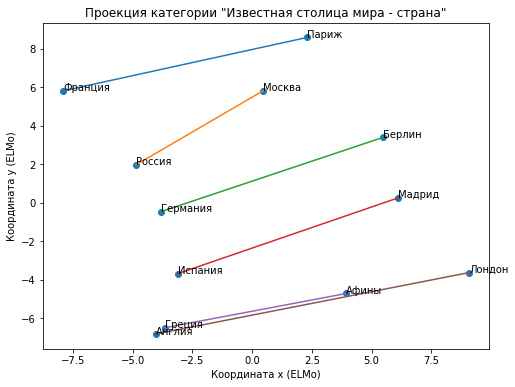

time: 187 ms (started: 2021-05-18 18:50:14 +03:00)


In [62]:
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.plot([ -7.9052763 , 2.300471 ],[ 5.812577   , 8.586756 ],label='Париж-Франция')
plt.plot([ -4.8596287 , 0.47385508 ],[ 1.9666462      , 5.825759 ],label='Москва-Россия')
plt.plot([  -3.8226213 , 5.4707723  ],[ -0.4695723  , 3.3892717 ],label='Берлин-Германия')
plt.plot([  -3.1112297 , 6.112267 ],[ -3.6879723  , 0.24979307 ],label='Мадрид-Испания')
plt.plot([  -3.6640763 , 3.944341 ],[ -6.4998927  , -4.718514 ],label='Афины-Греция')
plt.plot([  -4.020461 , 9.081581 ],[ -6.8231454  , -3.6317143 ],label='Лондон-Англия')
plt.text(-7.9052763 ,  5.812577, 'Франция', fontsize=10)
plt.text(2.300471  ,  8.586756, 'Париж', fontsize=10)
plt.text(-4.8596287 ,  1.9666462, 'Россия', fontsize=10)
plt.text(0.47385508,  5.825759, 'Москва', fontsize=10)
plt.text(-3.8226213 , -0.4695723, 'Германия', fontsize=10)
plt.text(5.4707723 ,  3.3892717, 'Берлин', fontsize=10)
plt.text(-3.1112297 , -3.6879723, 'Испания', fontsize=10)
plt.text(6.112267  ,  0.24979307, 'Мадрид', fontsize=10)
plt.text(-3.6640763 , -6.4998927, 'Греция', fontsize=10)
plt.text(3.944341  , -4.718514, 'Афины', fontsize=10)
plt.text(-4.020461  , -6.8231454, 'Англия', fontsize=10)
plt.text(9.081581  , -3.6317143, 'Лондон', fontsize=10)
plt.title('Проекция категории "Известная столица мира - страна"')
#plt.grid()
plt.xlabel('Координата х (ELMo)')
plt.ylabel('Координата y (ELMo)')
#plt.legend()

# Аналогия "Антонимы с приставкой не-"

In [7]:
words_adj = 'убедительный неубедительный удобный неудобный эффективный неэффективный простой непростой приятный неприятный известный неизвестный'

time: 0 ns (started: 2021-05-19 17:14:34 +03:00)


In [3]:
elmo = hub.Module("http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-wiki_600k_steps.tar.gz",trainable=True)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
embeddings_adj = elmo([words_adj], signature="default", as_dict=True)["elmo"]
#sess.run(embeddings_2)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


time: 10.4 s (started: 2021-05-19 14:54:55 +03:00)


In [4]:
adj_embs = sess.run(embeddings_adj)

time: 1min 24s (started: 2021-05-19 14:55:05 +03:00)


In [5]:
adj_embs.shape

(1, 12, 1024)

time: 266 ms (started: 2021-05-19 14:56:31 +03:00)


In [8]:
words_adj.split()

['убедительный',
 'неубедительный',
 'удобный',
 'неудобный',
 'эффективный',
 'неэффективный',
 'простой',
 'непростой',
 'приятный',
 'неприятный',
 'известный',
 'неизвестный']

time: 0 ns (started: 2021-05-19 17:14:35 +03:00)


In [9]:
test = pd.DataFrame()
for word_id in range(len(words_adj.split())):
    test = test.append(pd.Series(adj_embs[0][word_id]),ignore_index=True)

test.index = words_adj.split()

time: 93 ms (started: 2021-05-19 17:22:14 +03:00)


In [10]:
test

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
убедительный,0.192006,1.016074,0.168550,-0.312295,-0.162199,-0.574115,1.277917,-0.625941,-0.179113,0.499662,...,-0.399987,-0.786302,-0.266793,-0.426922,0.055397,-0.086139,-0.646259,0.165887,-0.156055,0.780924
неубедительный,0.401637,1.232249,-0.392377,0.116698,-0.574135,-0.403547,0.943240,0.107940,-0.100440,-0.015194,...,0.059035,-0.630500,-0.301560,-0.670511,-0.191204,-0.142156,-0.424219,0.078307,0.375112,0.887779
удобный,0.989993,0.745916,0.183563,0.239311,-0.893524,-0.278466,0.288426,0.515151,0.673639,-0.875693,...,-0.063357,-0.691543,-0.024559,-0.811020,-0.314333,-0.127235,-0.238780,-0.220349,-0.385990,0.627421
неудобный,0.651700,0.988677,0.045829,0.327098,-0.871085,-0.247328,0.623349,0.090247,1.076740,-1.127741,...,0.019126,-0.727508,0.195066,-0.956528,-0.352212,-0.078855,0.140145,-0.283619,-0.122688,0.738525
эффективный,0.626000,1.089692,0.107236,-0.078103,-1.041044,-0.387742,0.639338,-0.409522,0.805916,0.068312,...,0.231385,-0.462823,-0.553886,-0.977573,-0.140522,0.078632,-0.422420,-0.189227,-0.403984,1.001140
неэффективный,0.483159,1.078231,0.075333,-0.025022,-0.962496,-0.506400,0.880895,-0.696319,1.007520,0.099852,...,0.230563,-0.185895,-0.443310,-1.035418,-0.080767,-0.169250,-0.348790,-0.155384,-0.063598,0.943451
простой,-0.232658,1.042483,-0.246089,0.773209,-1.025661,-1.137653,1.507453,-0.533747,1.067799,-0.787688,...,-0.092109,-0.075220,0.084870,-0.282575,0.582444,-0.346931,-0.658691,0.104172,-0.109998,0.784378
непростой,-0.069328,0.853522,-0.248129,0.379015,-1.040625,-1.044262,1.674891,0.208489,1.644157,-1.819151,...,0.007453,-0.040163,-0.104223,-0.845586,0.453786,-0.763100,-0.436080,-0.005817,0.058260,0.915809
приятный,0.068836,1.321591,-0.424385,0.670439,-1.310657,-0.329485,1.052181,0.634957,0.746182,-1.075968,...,-0.178166,-0.293604,0.026528,-0.691697,-0.006565,-0.833835,-0.230388,-0.044521,-0.203499,0.898814
неприятный,0.455683,1.752419,-0.031268,0.951046,-1.053755,-0.246119,1.377915,1.144682,0.385215,-0.866642,...,-0.171161,-0.070194,0.114302,-0.754866,0.408405,-0.679127,-0.162262,-0.505247,-0.162170,0.475325


time: 63 ms (started: 2021-05-19 17:22:16 +03:00)


In [11]:
pca = PCA(n_components=2)
pca.fit_transform(test)

array([[-7.9997406, -7.6993217],
       [-6.576246 , -4.963604 ],
       [-5.856479 , -1.1570737],
       [-4.1848397,  1.0754032],
       [-4.9058557,  1.0590101],
       [-3.2067356,  3.3486712],
       [ 0.5875462,  6.490009 ],
       [ 1.7876263,  8.548211 ],
       [ 3.109837 ,  2.9531367],
       [ 5.7029533,  1.0530361],
       [ 9.463768 , -5.533396 ],
       [12.078163 , -5.174083 ]], dtype=float32)

time: 125 ms (started: 2021-05-19 17:23:10 +03:00)


In [12]:
test = pca.fit_transform(test)

time: 15 ms (started: 2021-05-19 17:23:11 +03:00)


In [14]:
x = [row[0] for row in test]
y = [row[1] for row in test]

time: 15 ms (started: 2021-05-19 17:23:16 +03:00)


In [15]:
idxes = (0,2,4,6,8,10)

time: 0 ns (started: 2021-05-19 17:23:19 +03:00)


Text(0, 0.5, 'Координата y (ELMo)')

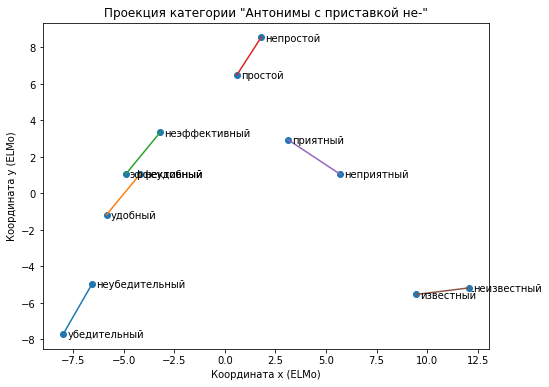

time: 531 ms (started: 2021-05-19 17:27:15 +03:00)


In [22]:
plt.figure(figsize=(8,6))

plt.scatter(x,y)
for i in idxes:
    plt.plot([test[i][0],test[i+1][0]], [test[i][1], test[i+1][1]])
    
for i in range(len(pca.fit_transform(test))):
    plt.text(pca.fit_transform(test)[i][0]+0.2,pca.fit_transform(test)[i][1]-0.2,words_adj.split()[i])
    
plt.title('Проекция категории "Антонимы с приставкой не-"')
#plt.grid()
plt.xlabel('Координата х (ELMo)')
plt.ylabel('Координата y (ELMo)')

In [46]:
pca = PCA(n_components=2)
pca.fit_transform(test)

array([[-7.9052763 ,  5.812577  ],
       [ 2.300471  ,  8.586756  ],
       [-4.8596287 ,  1.9666462 ],
       [ 0.47385508,  5.825759  ],
       [-3.8226213 , -0.4695723 ],
       [ 5.4707723 ,  3.3892717 ],
       [-3.1112297 , -3.6879723 ],
       [ 6.112267  ,  0.24979307],
       [-3.6640763 , -6.4998927 ],
       [ 3.944341  , -4.718514  ],
       [-4.020461  , -6.8231454 ],
       [ 9.081581  , -3.6317143 ]], dtype=float32)

time: 734 ms (started: 2021-05-18 18:33:56 +03:00)


In [47]:
test = pca.fit_transform(test)

time: 47 ms (started: 2021-05-18 18:34:16 +03:00)


In [48]:
x = [row[0] for row in test]
y = [row[1] for row in test]
names = ['Париж', 'Франция', 'Москва', 'Россия', 'Берлин','Германия']

time: 15 ms (started: 2021-05-18 18:34:17 +03:00)


Text(0, 0.5, 'Координата y (ELMo)')

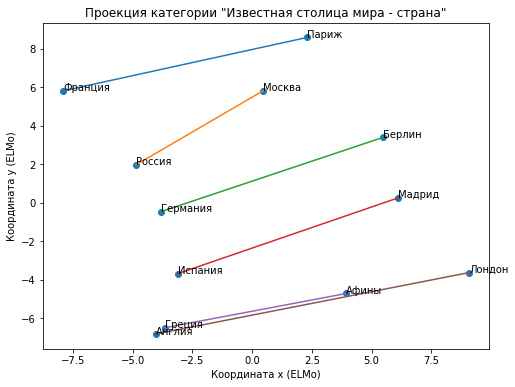

time: 187 ms (started: 2021-05-18 18:50:14 +03:00)


In [62]:
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.plot([ -7.9052763 , 2.300471 ],[ 5.812577   , 8.586756 ],label='Париж-Франция')
plt.plot([ -4.8596287 , 0.47385508 ],[ 1.9666462      , 5.825759 ],label='Москва-Россия')
plt.plot([  -3.8226213 , 5.4707723  ],[ -0.4695723  , 3.3892717 ],label='Берлин-Германия')
plt.plot([  -3.1112297 , 6.112267 ],[ -3.6879723  , 0.24979307 ],label='Мадрид-Испания')
plt.plot([  -3.6640763 , 3.944341 ],[ -6.4998927  , -4.718514 ],label='Афины-Греция')
plt.plot([  -4.020461 , 9.081581 ],[ -6.8231454  , -3.6317143 ],label='Лондон-Англия')
plt.text(-7.9052763 ,  5.812577, 'Франция', fontsize=10)
plt.text(2.300471  ,  8.586756, 'Париж', fontsize=10)
plt.text(-4.8596287 ,  1.9666462, 'Россия', fontsize=10)
plt.text(0.47385508,  5.825759, 'Москва', fontsize=10)
plt.text(-3.8226213 , -0.4695723, 'Германия', fontsize=10)
plt.text(5.4707723 ,  3.3892717, 'Берлин', fontsize=10)
plt.text(-3.1112297 , -3.6879723, 'Испания', fontsize=10)
plt.text(6.112267  ,  0.24979307, 'Мадрид', fontsize=10)
plt.text(-3.6640763 , -6.4998927, 'Греция', fontsize=10)
plt.text(3.944341  , -4.718514, 'Афины', fontsize=10)
plt.text(-4.020461  , -6.8231454, 'Англия', fontsize=10)
plt.text(9.081581  , -3.6317143, 'Лондон', fontsize=10)
plt.title('Проекция категории "Известная столица мира - страна"')
#plt.grid()
plt.xlabel('Координата х (ELMo)')
plt.ylabel('Координата y (ELMo)')
#plt.legend()